#  Airplane Risk Analysis for Business Expansion  

## ✈️ **Introduction**  
As part of a company's diversification strategy, they are exploring the aviation industry. However, operating airplanes come with inherent risks. To make informed investment decisions, they must assess which airplane types pose the **lowest operational risk** based on historical accident data.  

In this project, I will analyze **aviation accident data (1962–2023)** from the National Transportation Safety Board (NTSB) to:  
- **Identify risk factors** associated with airplane accidents.  
- **Determine the safest airplane types** for commercial and private enterprise operations.  
- **Provide actionable insights** to the aviation division for selecting airplanes with minimal risk.   


## 【1】*Data Exploration*  

In [1]:
# Import pandas as standard alias  
import pandas as pd                 

In [2]:
# Load the dataset and inspect the first few rows
df = pd.read_csv("Data/Aviation_Data.csv")
df.head()

C:\Users\vihaa\AppData\Local\Temp\ipykernel_22036\3669091942.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The dataset raised a **DtypeWarning**, meaning some columns contain **mixed data types** (e.g., numbers and text), which can cause issues during analysis; we will address this in the data cleaning stage by inspecting these columns, converting them to appropriate types, and handling inconsistencies.  

As you can see from the output above, this dataset is **very extensive**, containing numerous columns with detailed aviation accident records. However, to effectively answer our **business question**, we must focus only on the most relevant data points. By narrowing down our selection, we ensure that our analysis remains **targeted, efficient, and data-driven** in making a well-informed decision.  



### **Key Columns We Will Use:**

- **`Country`** → Confirms that we are focusing exclusively on **U.S. accidents** as per our business scope.  
- **`Aircraft.Category`** → Ensures we are analyzing **airplanes** only, filtering out other aircraft types.  
- **`Purpose.of.flight`** → Filters for **business flights**, since our company is focused on commercial aviation.  
- **`Make` & `Model`** → Identifies aircraft manufacturers and specific models to compare safety records.  
- **`Event.Date`** → Allows us to analyze accident trends over time.  
- **`Broad.phase.of.flight`** → Helps identify when accidents are most likely to occur (e.g., takeoff, cruise, landing).  
- **`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`** → Quantifies accident severity and survivability.  
  
*Note: We are assuming the company operates in the **United States**, so we are only interested in accidents that happened within the U.S.. Filtering our dataset this way ensures that our analysis remains relevant and focused on the most applicable data.*  
  


In [3]:
# Check the dimensions of the dataset (rows, columns)
df.shape

(90348, 31)

In [4]:
# View a summary of the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Define the list of relevant columns
relevant_columns = ["Make", "Model", "Event.Date", "Purpose.of.flight", 
                    "Broad.phase.of.flight", "Total.Fatal.Injuries", 
                    "Total.Serious.Injuries", "Total.Minor.Injuries", 
                    "Total.Uninjured", "Aircraft.Category", "Country"]

# Display info for relevant columns
df[relevant_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88826 non-null  object 
 1   Model                   88797 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Purpose.of.flight       82697 non-null  object 
 4   Broad.phase.of.flight   61724 non-null  object 
 5   Total.Fatal.Injuries    77488 non-null  float64
 6   Total.Serious.Injuries  76379 non-null  float64
 7   Total.Minor.Injuries    76956 non-null  float64
 8   Total.Uninjured         82977 non-null  float64
 9   Aircraft.Category       32287 non-null  object 
 10  Country                 88663 non-null  object 
dtypes: float64(4), object(7)
memory usage: 7.6+ MB


In [6]:
# View summary statistics for relevant columns
df[relevant_columns].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,77488.000000,76379.000000,76956.000000,82977.000000
mean,0.647855,0.279881,0.357061,5.325440
std,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


### **Data Exploration Conclusion**  

Our dataset contains **90,348** entries, but several key columns have **missing values**, particularly in `Aircraft Category` and `Broad Phase of Flight`. This means we need to handle gaps carefully to avoid losing valuable data.  

*Key Takeaways from This Exploration*:  
- Many records are missing in `aircraft category`, limiting detailed classification.  
- **Injury severity columns** have missing values but mostly contain **zeroes**, which suggests we can reasonably fill gaps with 0.  
- **Flight purpose** is missing for some records, but since we are focused on **business flights**, we will filter accordingly.  
- The dataset includes **non-U.S.** accidents, so we will filter for only **U.S.** incidents to maintain relevance.  

Next, we will clean the data to ensure **accuracy and consistency** for our analysis.




## 【2】*Data Cleaning*  


###  Why Cleaning Is Necessary?  
- **Ensures Data Accuracy** → Missing values can distort trends and patterns.  
- **Improves Visualization** → Charts and graphs require complete data for meaningful insights.   

To ensure our final insights are reliable and data-driven, we need to properly handle these missing values.  

Here we will:  
- Drop columns with excessive missing values.  
- Fill or impute missing values where necessary.  
- Filter and refine the dataset for meaningful analysis.  

By carefully cleaning the data, we set the foundation for accurate **visualization and decision-making**.


### Filtering For U.S. Accidents 

In [7]:
# Filter accidents that occurred in the United States
df_clean = df[df["Country"] == "United States"].copy()

print(f"Number of records before filtering: {df.shape[0]}\n"
      f"Number of records after filtering: {df_clean.shape[0]}")

Number of records before filtering: 90348
Number of records after filtering: 82248


We filtered the dataset to include only accidents that occurred in the United States. This reduced the number of records from **90,348** to **82,248**, confirming that the filtering worked as expected.


### Filtering For Airplanes 

In [8]:
df_clean[df_clean["Aircraft.Category"] == "Airplane"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


Filtering by "Aircraft.Category" reduces records from **82,248 to 24,229**, indicating missing or misclassified data. We need a better approach to accurately filter airplane-related records.

In [9]:
df_clean["Aircraft.Category"].value_counts(dropna=False)

Aircraft.Category
NaN                  54094
Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64

Why did our Airplane filter fail?  

- Filtering for U.S. accidents worked well because **only 1,685 out of 90,348** entries in the "Country" column were missing.  
- In contrast, **54,094 out of 82,248** entries in "Aircraft.Category" are missing—over **65% of the data**.  

Since filtering this way would drop most records, we take a different approach:  
For rows where "Aircraft.Category" is missing, we compare the "Make" column to an **FAA airplane registry** to filter accurately.

In [10]:
FAA_df = pd.read_csv("Data/FAA_Airplane_Registry.csv")

# Extract unique manufacturer names, drop NaN values, convert to lowercase
airplane_manufacturers = (
    FAA_df["mfr_name"]
    .dropna()
    .str.lower()
    .unique()
    .tolist()
)

airplane_manufacturers[:10]

['999 leasing ii llc',
 'a r b c inc dba lindstrand',
 'ab sportine aviacija',
 'aero commander',
 'aero vodochody',
 'aerofab inc',
 'aerojones aviation usa llc',
 'aeronca',
 'aeropilot s r o',
 'aeroprakt manufacturing sp zoo']

In [11]:
# Convert the Make column to lowercase for accurate comparability
df_clean["Make"] = df_clean["Make"].str.lower()
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [12]:
# Filter known airplanes using Aircraft Category or Make column
df_clean = df_clean[
    (df_clean["Aircraft.Category"] == "Airplane")
    | (df_clean["Aircraft.Category"].isna()
       & df_clean["Make"].isin(airplane_manufacturers))
].copy()

df_clean

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


By using the FAA registry to identify airplane manufacturers instead of relying solely on the "Aircraft.Category" column, we increase our valid entries from **24,229 to 68,266**.  

This ensures we retain significantly more relevant data while still focusing only on airplanes.  


### Filtering For Business Flights 

In [13]:
df_clean['Purpose.of.flight'].value_counts(dropna=False)

Purpose.of.flight
Personal                     40827
Instructional                 9161
Unknown                       4665
Business                      3387
Aerial Application            3238
NaN                           2007
Positioning                   1167
Other Work Use                 850
Ferry                          600
Public Aircraft                588
Aerial Observation             520
Executive/corporate            442
Flight Test                    266
Skydiving                      166
Banner Tow                     100
Public Aircraft - Federal       62
Air Race show                   61
Glider Tow                      40
Public Aircraft - State         32
Air Race/show                   28
Public Aircraft - Local         19
Firefighting                    16
External Load                   10
ASHO                             6
Air Drop                         5
PUBS                             3
Name: count, dtype: int64

Similar to how we filtered for U.S. accidents, we are now refining our dataset to include only business flights. Since the number of missing values in the Purpose.of.flight column is minimal compared to the total entries, we can filter out rows where this value is missing without significantly impacting our dataset. This ensures that our analysis remains relevant to the business-focused scope of this project.

In [14]:
# Filter the dataframe to include only business flights
df_clean = df[df["Purpose.of.flight"] == "Business"].copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 90326
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                4018 non-null   object 
 1   Investigation.Type      4018 non-null   object 
 2   Accident.Number         4018 non-null   object 
 3   Event.Date              4018 non-null   object 
 4   Location                4017 non-null   object 
 5   Country                 4005 non-null   object 
 6   Latitude                929 non-null    object 
 7   Longitude               929 non-null    object 
 8   Airport.Code            2099 non-null   object 
 9   Airport.Name            2261 non-null   object 
 10  Injury.Severity         4014 non-null   object 
 11  Aircraft.damage         3926 non-null   object 
 12  Aircraft.Category       947 non-null    object 
 13  Registration.Number     3965 non-null   object 
 14  Make                    4018 non-null   obje

### Dropping Irrelevant Columns

In [15]:
# Updating df_clean to keep only the relevant columns
df_clean = df_clean[relevant_columns]

# Verify the updated dataframe structure
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 90326
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4018 non-null   object 
 1   Model                   4016 non-null   object 
 2   Event.Date              4018 non-null   object 
 3   Purpose.of.flight       4018 non-null   object 
 4   Broad.phase.of.flight   3373 non-null   object 
 5   Total.Fatal.Injuries    3673 non-null   float64
 6   Total.Serious.Injuries  3589 non-null   float64
 7   Total.Minor.Injuries    3608 non-null   float64
 8   Total.Uninjured         3825 non-null   float64
 9   Aircraft.Category       947 non-null    object 
 10  Country                 4005 non-null   object 
dtypes: float64(4), object(7)
memory usage: 376.7+ KB


In [16]:
# Dropping columns that already served their purpose
df_clean = df_clean.drop(
    columns=["Country", "Aircraft.Category", "Purpose.of.flight"]
)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4018 non-null   object 
 1   Model                   4016 non-null   object 
 2   Event.Date              4018 non-null   object 
 3   Broad.phase.of.flight   3373 non-null   object 
 4   Total.Fatal.Injuries    3673 non-null   float64
 5   Total.Serious.Injuries  3589 non-null   float64
 6   Total.Minor.Injuries    3608 non-null   float64
 7   Total.Uninjured         3825 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.5+ KB


### Handling Missing Values

#### *Handling Missing Values in the* `Injuries` *Columns*

In [17]:
df_clean.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,3673.000000,3589.000000,3608.000000,3825.000000
mean,0.629730,0.245472,0.306541,1.691765
std,1.290829,0.717425,0.865980,6.587232
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,2.000000
max,16.000000,13.000000,17.000000,274.000000


*Why are most the quartiles 0?*

The quartiles (25%, 50%, and 75%) are all showing 0.0 probably because a significant number of values in these columns are likely 0. Let's investigate further:

In [18]:
# Check Value Counts
df_clean[
    ["Total.Fatal.Injuries", "Total.Serious.Injuries",
     "Total.Minor.Injuries", "Total.Uninjured"]
].apply(pd.Series.value_counts)


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0.0,2609.0,3034.0,2964.0,1479
1.0,438.0,349.0,388.0,980
2.0,316.0,141.0,155.0,674
3.0,165.0,41.0,52.0,268
4.0,76.0,13.0,29.0,174
5.0,31.0,5.0,10.0,95
6.0,19.0,1.0,4.0,48
7.0,3.0,2.0,1.0,31
8.0,8.0,1.0,2.0,22
9.0,1.0,1.0,NaN,17


From this, we observe that the majority of entries in each injury-related column are 0, making it the most common value. Additionally, there are cases where all four columns have values, some have partial values, or only one column is filled. However, rows where all four columns are missing provide no useful information and should be dropped. For all other missing entries, we will replace them with 0.0 to maintain consistency in the dataset.

In [19]:
# Identify rows where all injury-related columns are missing
df_clean[
    df_clean[
        ["Total.Fatal.Injuries", "Total.Serious.Injuries",
         "Total.Minor.Injuries", "Total.Uninjured"]
    ].isnull().all(axis=1)
]

,Make,Model,Event.Date,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
22734,Beech,A80,1989-04-12,NaN,NaN,NaN,NaN,NaN
25479,Bell,222-UT,1990-05-14,NaN,NaN,NaN,NaN,NaN
36331,Hughes,269C,1994-11-02,Standing,NaN,NaN,NaN,NaN
62585,Douglas,DC-3,2007-05-25,NaN,NaN,NaN,NaN,NaN


In [20]:
# Drop rows where all injury-related columns are missing
df_clean = df_clean[
    ~df_clean[
        ["Total.Fatal.Injuries", "Total.Serious.Injuries",
         "Total.Minor.Injuries", "Total.Uninjured"]
    ].isnull().all(axis=1)
]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4014 non-null   object 
 1   Model                   4012 non-null   object 
 2   Event.Date              4014 non-null   object 
 3   Broad.phase.of.flight   3372 non-null   object 
 4   Total.Fatal.Injuries    3673 non-null   float64
 5   Total.Serious.Injuries  3589 non-null   float64
 6   Total.Minor.Injuries    3608 non-null   float64
 7   Total.Uninjured         3825 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.2+ KB


In [21]:
# Replace missing values with 0.0 in injury-related columns
cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries",
        "Total.Minor.Injuries", "Total.Uninjured"]
df_clean.loc[:, cols] = df_clean[cols].fillna(0.0)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4014 non-null   object 
 1   Model                   4012 non-null   object 
 2   Event.Date              4014 non-null   object 
 3   Broad.phase.of.flight   3372 non-null   object 
 4   Total.Fatal.Injuries    4014 non-null   float64
 5   Total.Serious.Injuries  4014 non-null   float64
 6   Total.Minor.Injuries    4014 non-null   float64
 7   Total.Uninjured         4014 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.2+ KB


Since the most common value in the injury columns is 0, it is reasonable to assume that missing values likely represent cases with no reported injuries. By replacing them with 0, we maintain the dataset's accuracy while preventing unnecessary data loss.

#### *Handling Missing Values in the* `Make` and `Model` *Columns*

We’ve encountered an edge case where rows categorized as "airplane" may have missing values in either the `Make` or `Model` column, yet were retained. These rows don’t add value to the analysis, as knowing the category without `Make` or `Model` isn’t useful for answering the business question. Therefore, we decided to drop rows with missing values in these columns to ensure our dataset remains complete and relevant.


In [22]:
# Drop rows where either the 'Make' or 'Model' column has missing values
df_clean = df_clean.dropna(subset=["Make", "Model"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4012 non-null   object 
 1   Model                   4012 non-null   object 
 2   Event.Date              4012 non-null   object 
 3   Broad.phase.of.flight   3371 non-null   object 
 4   Total.Fatal.Injuries    4012 non-null   float64
 5   Total.Serious.Injuries  4012 non-null   float64
 6   Total.Minor.Injuries    4012 non-null   float64
 7   Total.Uninjured         4012 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.1+ KB


#### Addressing Data Entry Inconsistencies in the `Make` Column

As I explored the dataset using the Data Wrangler extension in Visual Studio Code, I noticed multiple instances of aircraft manufacturers being recorded inconsistently. A clear example of this was De Havilland and DeHavilland being treated as two separate entities, even though they refer to the same company.

This discrepancy stems from human data entry errors, such as inconsistent spacing, capitalization, or slight spelling variations. If left uncorrected, these inconsistencies could misrepresent our analysis by inflating the number of unique aircraft manufacturers, leading to misleading insights.

In [23]:
len(df['Make'].unique())

8238

##### Applying Fuzzy String Matching to Detect Similar Entries

To resolve this issue, I researched potential solutions and found multiple discussions in coding forums recommending **fuzzy string matching** as an effective way to detect and group similar text entries. 

Fuzzy string matching is a technique that compares two strings and determines their similarity based on an algorithmic score. It helps identify variations of the same word that may have minor differences in spelling or formatting. By setting a **similarity threshold**, we could group entries that are highly similar, ensuring that slight inconsistencies in data entry did not lead to incorrect conclusions.

For this, I used the Python library **TheFuzz**.
You can learn more by checking [TheFuzz Documentation](https://pypi.org/project/thefuzz/)

In [24]:
# Import process module from TheFuzz for fuzzy string matching
from thefuzz import process

In [25]:
# Get unique makes
unique_makes = df_clean["Make"].unique()

# Set a similarity threshold (95% means strings must be highly similar)
threshold = 95  

make_groups = {}

# Group similar makes 
for make in unique_makes:
    match = process.extractOne(
        make, make_groups.keys(), score_cutoff=threshold
    )
    
    if match:
        make_groups[match[0]].append(make)
    else:
        make_groups[make] = [make]

# Display grouped makes that are likely duplicates
for key, group in make_groups.items():
    if len(group) > 1:
        print(f"Group: {group}")


Group: ['Cessna', 'CESSNA']
Group: ['Piper', 'PIPER']
Group: ['Aerospatiale', 'AEROSPATIALE']
Group: ['Mooney', 'MOONEY']
Group: ['Beech', 'BEECH']
Group: ['Bellanca', 'BELLANCA']
Group: ['Mitsubishi', 'MITSUBISHI']
Group: ['Robinson', 'ROBINSON']
Group: ['Bell', 'BELL']
Group: ['Maule', 'MAULE']
Group: ['Hughes', 'HUGHES']
Group: ['Enstrom', 'ENSTROM']
Group: ['De Havilland', 'Dehavilland', 'DeHavilland', 'DEHAVILLAND']
Group: ['Aero Commander', 'AERO COMMANDER']
Group: ['Grumman', 'GRUMMAN']
Group: ['Fairchild', 'FAIRCHILD']
Group: ['Britten-norman', 'BRITTEN-NORMAN']
Group: ['Hiller', 'HILLER']
Group: ['Boeing', 'BOEING']
Group: ['North American', 'NORTH AMERICAN']
Group: ['Learjet', 'LEARJET']
Group: ['Stinson', 'STINSON']
Group: ['Sikorsky', 'SIKORSKY']
Group: ['Gulfstream', 'GULFSTREAM']
Group: ['Champion', 'CHAMPION']
Group: ['Hawker Siddeley', 'Hawker Siddely']
Group: ['Socata', 'SOCATA']
Group: ['Israel Aircraft Industries', 'ISRAEL AIRCRAFT INDUSTRIES']
Group: ['Air Tractor',

##### Standardizing the "Make" Column  

Now that we have identified all the extremely similar entries in the "Make" column using fuzzy string matching, the next step is to standardize these entries. Standardization ensures that variations due to capitalization, spacing, or minor misspellings do not cause the same manufacturer to be treated as separate entities.  

In [26]:
# Create a mapping dictionary using the first value as the standard name
standardized_makes = {
    variant: group[0] 
    for group in make_groups.values() 
    for variant in group
}

# Apply the mapping to the 'Make' column
df_clean["Make"] = df_clean["Make"].replace(standardized_makes)

len(df_clean["Make"].unique())


250

We addressed inconsistencies in the "Make" column by standardizing manufacturer names that varied due to human data entry errors. This step prevents duplicate entries from appearing as separate entities. With this correction, all instances of the same manufacturer are now grouped correctly. The number of unique aircraft manufacturers in the dataset dropped from **8,238** to **250**. Ensuring that any subsequent insights derived from the data are based on a reliable and unified representation. 

*Note: From 1962 to 2023, the aviation industry has undergone significant changes, including mergers, acquisitions, and rebranding of manufacturers. In our analysis, we assume that when a company undergoes such transitions, it is treated as a distinct entity, as these changes often signify shifts in ownership, design philosophy, and operational practices.* 

#### *Extracting and Storing Event Years*
Storing `Event.Date` as datetime objects rather than plain strings provides greater flexibility for data analysis. With datetime, we can easily extract specific components like years, months, or days, and efficiently filter or group data. In this case, we are only interested in the year of each event because our analysis focuses on long-term trends rather than individual dates. By extracting only the year, we reduce unnecessary detail, making visualizations clearer and more interpretable while maintaining the essential chronological context.


In [27]:
# Convert 'Event.Date' column to datetime format
df_clean["Event.Date"] = pd.to_datetime(
    df_clean["Event.Date"], format="%Y-%m-%d"
)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    4012 non-null   object        
 1   Model                   4012 non-null   object        
 2   Event.Date              4012 non-null   datetime64[ns]
 3   Broad.phase.of.flight   3371 non-null   object        
 4   Total.Fatal.Injuries    4012 non-null   float64       
 5   Total.Serious.Injuries  4012 non-null   float64       
 6   Total.Minor.Injuries    4012 non-null   float64       
 7   Total.Uninjured         4012 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 282.1+ KB


In [28]:
# Extract the year from Event.Date and store it in a new column
df_clean["Event.Year"] = df_clean["Event.Date"].dt.year
df_clean.head()

,Make,Model,Event.Date,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
8,Cessna,401B,1982-01-01,Landing,0.0,0.0,0.0,2.0,1982
25,Cessna,414A,1982-01-03,Approach,8.0,0.0,0.0,0.0,1982
36,Cessna,206,1982-01-04,Taxi,1.0,0.0,1.0,0.0,1982
37,Navion,A,1982-01-05,Cruise,3.0,0.0,0.0,0.0,1982
40,Rockwell,114,1982-01-05,Cruise,0.0,0.0,0.0,1.0,1982


In [29]:
# Remove the 'Event.Date' column as we now have 'Event.Year'
df_clean.drop(columns=["Event.Date"], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4012 non-null   object 
 1   Model                   4012 non-null   object 
 2   Broad.phase.of.flight   3371 non-null   object 
 3   Total.Fatal.Injuries    4012 non-null   float64
 4   Total.Serious.Injuries  4012 non-null   float64
 5   Total.Minor.Injuries    4012 non-null   float64
 6   Total.Uninjured         4012 non-null   float64
 7   Event.Year              4012 non-null   int32  
dtypes: float64(4), int32(1), object(3)
memory usage: 266.4+ KB


#### *Handling Missing Values in the* `Broad.phase.of.flight`*Column*  

The `Broad.phase.of.flight` column contains missing values, but dropping these rows entirely would result in losing valuable data across other key metrics, such as aircraft make, model, and injury counts. Since our primary goal is to assess accident trends comprehensively, removing these rows would reduce the reliability of our dataset.  

However, `Broad.phase.of.flight` remains important for analyzing **fatality proportions by phase of flight**. To maintain accuracy without compromising our full dataset, we will:  
- Keep the missing values in `df_clean` to preserve all relevant accident records.  
- Create a separate dataframe containing only records where `Broad.phase.of.flight` is available for specific analyses.  

This approach ensures that we retain a complete dataset for general risk analysis while still enabling focused insights on accident trends by flight phase when needed.  


In [30]:
# Create a copy of df_clean, removing rows with missing flight phase
df_clean_phase = df_clean.dropna(subset=["Broad.phase.of.flight"]).copy()

print(
    f"Shape of all filtered accident records: {df_clean.shape}\n"
    f"Shape of phase-filtered accident records: {df_clean_phase.shape}"
)

df_clean_phase


Shape of all filtered accident records: (4012, 8)
Shape of phase-filtered accident records: (3371, 8)


,Make,Model,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
8,Cessna,401B,Landing,0.0,0.0,0.0,2.0,1982
25,Cessna,414A,Approach,8.0,0.0,0.0,0.0,1982
36,Cessna,206,Taxi,1.0,0.0,1.0,0.0,1982
37,Navion,A,Cruise,3.0,0.0,0.0,0.0,1982
40,Rockwell,114,Cruise,0.0,0.0,0.0,1.0,1982
...,...,...,...,...,...,...,...,...
63693,Cessna,C208B,Taxi,0.0,0.0,0.0,2.0,2007
63695,Cessna,340,Approach,3.0,0.0,0.0,0.0,2007
63719,Gulfstream Aerospace,G-IV,Landing,0.0,0.0,0.0,8.0,2007
63805,Piper,PA-28R-200,Cruise,1.0,0.0,0.0,0.0,2007


### Extracting the Cleaned Dataset  

To build the interactive dashboard in Tableau, we need to extract the cleaned dataset from our notebook. By using the cleaned version, we eliminate inconsistencies and formatting issues, allowing for more accurate insights when developing the dashboard.  


In [31]:
# Writing the cleaned dataset to an Excel file   
df_clean.to_excel("Cleaned/Cleaned_Dataset.xlsx", index=False)

## 【3】*Data Visualization & Analysis*  

### **Understanding the Relationship Between Survivability and Operational Risk**

Our cleaned dataset contains records of all airplane accidents that occurred between 1962 and 2023. Each entry includes details about the airplane make, model, and the number of individuals who were uninjured, suffered injuries, or lost their lives in an accident.

Given this data, a logical way to assess the operational risk of different airplanes is by looking at survivability. If an accident did occur, but the majority of passengers and crew members survived without injury, this suggests that the airplane design, safety features, and overall reliability contributed to a lower operational risk. 

Thus, analyzing the total uninjured count per airplane make and model helps us identify which airplanes tend to provide better outcomes in accident scenarios. This is a crucial metric for making informed recommendations for business expansion.


#### Data Pre-processing  

To evaluate airplane survivability, we aggregate the total number of uninjured individuals for each airplane make and model. We then sort the data alphabetically by make to ensure that models of the same manufacturer are grouped together in the visualization for better clarity.  


In [32]:
# Aggregate total uninjured by Make and Model
uninjured_data = (
    df_clean.groupby(["Make", "Model"])["Total.Uninjured"]
    .sum()
    .reset_index()
)

# Sort first by total uninjured (descending), then alphabetically by Make
uninjured_data = (
    uninjured_data.sort_values(by=["Total.Uninjured"], ascending=False)
    .head(30)
)

uninjured_data = uninjured_data.sort_values(
    by=["Make", "Total.Uninjured"], ascending=[True, False]
)


#### Data Visualization

Using the processed data, we visualize the total number of uninjured individuals per airplane make and model. This helps identify which airplanes tend to have better survivability outcomes in accident scenarios.  


In [33]:
# Import Seaborn and Matplotlib as standard aliases
import seaborn as sns
import matplotlib.pyplot as plt

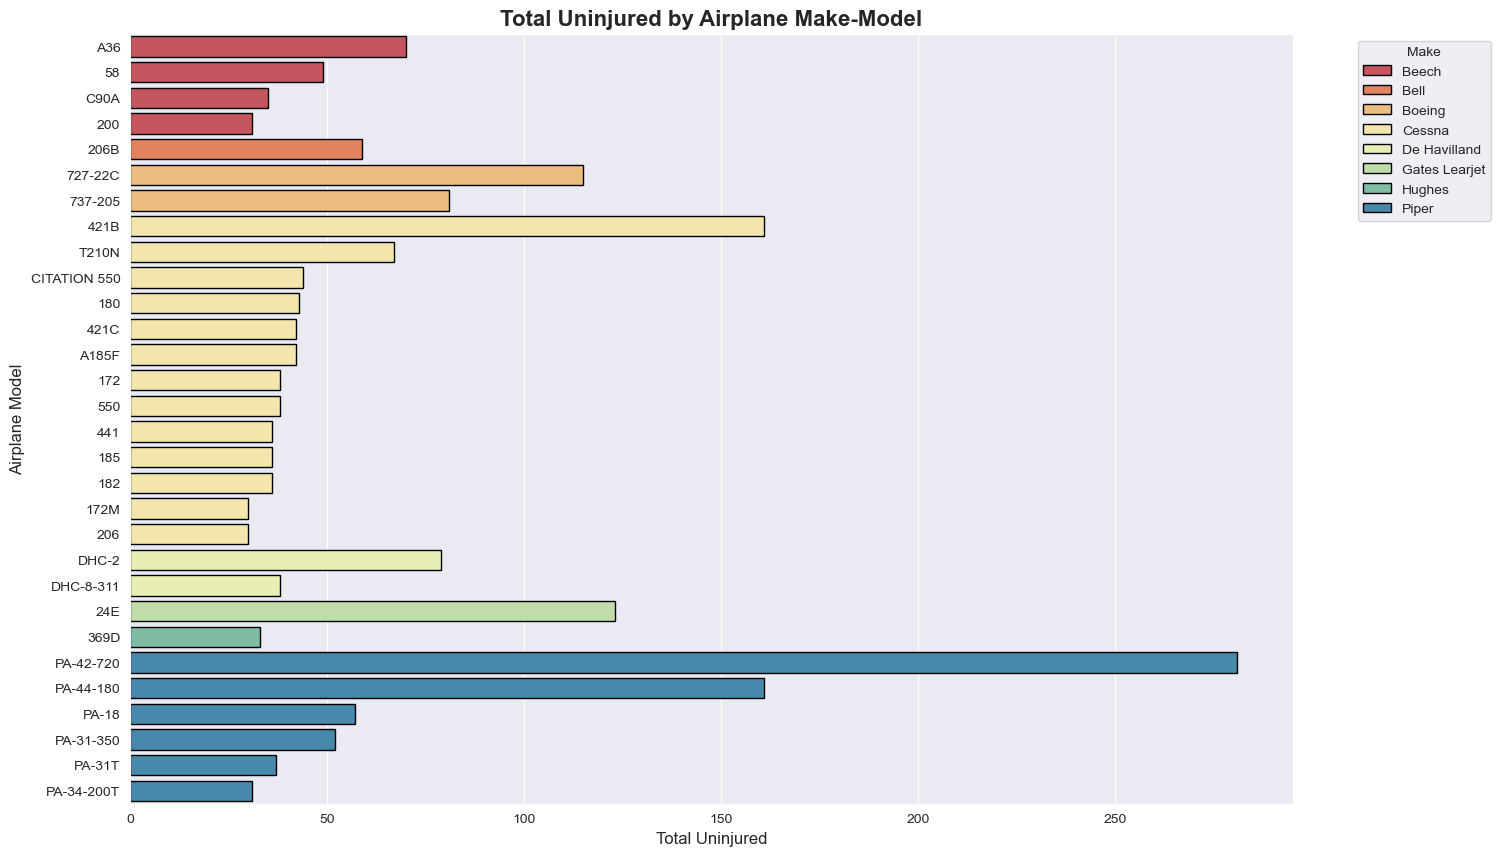

In [34]:
# Apply Seaborn's grid style
sns.set_style("darkgrid")

# Set figure size
plt.figure(figsize=(15, 10))

# Create a distinct color palette for makes
num_makes = uninjured_data["Make"].nunique()
palette = sns.color_palette("Spectral", num_makes)

# Create horizontal barplot
sns.barplot(
    data=uninjured_data,
    y="Model",
    x="Total.Uninjured",
    hue="Make",
    palette=palette,
    edgecolor="black",
    dodge=False  # Ensures same-make models appear together
)

# Titles and labels
plt.title("Total Uninjured by Airplane Make-Model", fontsize=16, fontweight="bold")
plt.xlabel("Total Uninjured", fontsize=12)
plt.ylabel("Airplane Model", fontsize=12)

# Move legend outside the plot
plt.legend(
    title="Make", bbox_to_anchor=(1.05, 1), 
    loc="upper left", fontsize=10
)

# Show plot
plt.show()


#### Insights from the Visualization  

This visualization compares airplane makes and models that have been involved in accidents, focusing on the total number of uninjured individuals for each. By analyzing this, we can identify which airplanes have historically resulted in more survivors, helping us assess which models are comparatively lower-risk in terms of survivability.  

*Key Observations:* 
- Some airplanes have significantly higher total uninjured counts, indicating that when accidents did occur, more people survived. This suggests these models may have features or operational factors that enhance survivability.  
- Conversely, some airplanes have very low total uninjured counts, meaning that when accidents happened, survival rates were minimal.  
- The distribution of total uninjured individuals varies widely across different makes and models, reflecting differences in airplane design, accident severity, and operational contexts.  
- Since this visualization strictly compares airplanes that have been in accidents, it does not provide a complete safety ranking. Instead, it highlights survivability trends among affected airplanes.  

By focusing on total uninjured counts, we gain a clearer perspective on which aircraft have demonstrated better survivability in real-world accident scenarios, offering insights into operational risk.


### **Exploring Crash Frequency by Phase of Flight Over Time**  

Airplane crashes can occur at any phase of flight, but some phases pose higher risks than others. Factors such as human error, mechanical failures, and environmental conditions vary across different stages of flight, influencing accident likelihood.  

Understanding how crashes are distributed across these phases over time can provide insights into operational risks and highlight areas where safety measures have been most impactful. This information is crucial for improving flight procedures, training, and aircraft design.


#### Data Pre-processing

In [35]:
df_clean_phase['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        775
Cruise         755
Takeoff        580
Approach       440
Maneuvering    266
Climb          147
Descent        140
Taxi           129
Go-around       63
Standing        51
Unknown         23
Other            2
Name: count, dtype: int64

The `Unknown` and `Other` flight phases provide little value to our analysis. `Unknown` lacks clarity, while `Other` is too vague. Their low counts (23 and 2) make them statistically insignificant, and including them would add noise without meaningful insight. Removing them keeps our visualization clear and focused on well-defined flight phases.

To further enhance clarity, we group crash occurrences by year and flight phase. This allows us to observe patterns over time and identify phases of flight where crashes have been more prevalent.

In [36]:
# Filter out 'Unknown' and 'Other' flight phases
df_filtered = df_clean_phase[
    ~df_clean_phase["Broad.phase.of.flight"].isin(["Unknown", "Other"])
]

# Group data by year and flight phase, counting occurrences
heatmap_data = (
    df_filtered.groupby(["Event.Year", "Broad.phase.of.flight"])
    .size()
    .unstack(fill_value=0)
)


#### Data Visualization  

We visualize crash occurrences by flight phase over time. This helps identify trends in when accidents are most likely to happen, providing insight into the riskiest phases of flight over time.  


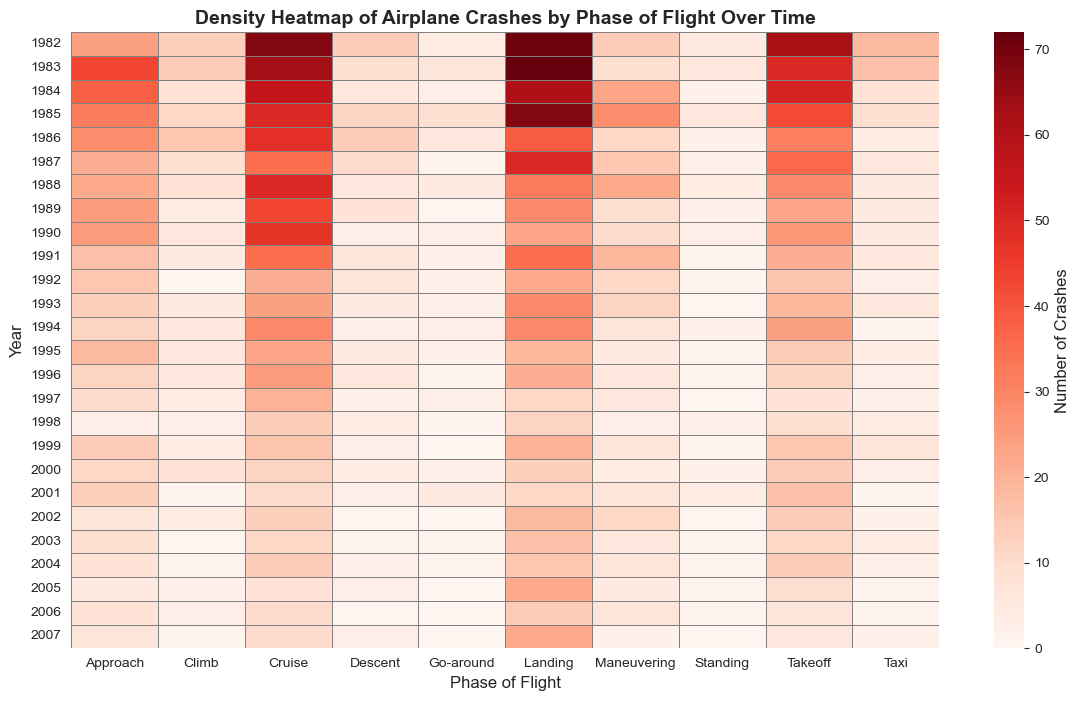

In [37]:
# Set figure size
plt.figure(figsize=(14, 8))

# Create the heatmap
ax = sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor="gray")

# Titles and labels
plt.title(
    "Density Heatmap of Airplane Crashes by Phase of Flight Over Time", 
    fontsize=14, fontweight="bold"
)
plt.xlabel("Phase of Flight", fontsize=12)
plt.ylabel("Year", fontsize=12)

# Label color bar to indicate number of crashes
colorbar = ax.collections[0].colorbar
colorbar.set_label("Number of Crashes", fontsize=12)

# Show plot
plt.show()


#### Insights from the Visualization

This heatmap highlights the most critical phases of flight in terms of crash frequency. **Cruise, landing, and takeoff** emerge as the riskiest stages, with cruise standing out as particularly hazardous in earlier years. Over time, crashes in all three phases have declined significantly, reflecting advancements in aviation technology, improved pilot training, and stricter safety regulations. However, while the overall risk has reduced, landing and takeoff still remain the most vulnerable phases.  

A clear shift is observed: crashes during cruise have decreased sharply, while those during landing and takeoff have seen a slower but steady decline. This suggests that improvements in navigation systems, air traffic control, and aircraft reliability have made cruise flight much safer. However, landing and takeoff remain high-risk phases, likely due to human error, challenging weather conditions, and mechanical failures that are more difficult to mitigate in these dynamic phases of flight.  

Additionally, our dataset was reduced due to missing values in the `broad.phase.of.flight` column, limiting the years available for analysis. Despite this, the visualization strongly reinforces that aviation safety has improved significantly, especially in cruise flight, while further advancements are still needed to enhance safety during takeoff and landing.  


### **Understanding the Relationship Between Injuries and Survivability over Time**

Our cleaned dataset contains records of airplane accidents that occurred between 1962 and 2023. Each entry details the number of individuals who were uninjured, suffered minor or serious injuries, or lost their lives in an accident.  

To assess operational risk, it is essential to examine how these injury outcomes have varied over time. A higher number of uninjured individuals in accidents suggests that certain aircraft designs, safety features, or operational conditions contribute to better survivability. Conversely, a higher proportion of injuries or fatalities may indicate increased risk factors.  

#### Data Pre-processing  
To analyze the trends in injuries and survivability over time, we aggregate accident records by year, summing up the number of fatal, serious, and minor injuries, along with uninjured individuals.

In [38]:
# Group by Event.Year and sum up the respective columns
df_yearly = df_clean.groupby("Event.Year", as_index=False)[
    [
        "Total.Fatal.Injuries", "Total.Serious.Injuries", 
        "Total.Minor.Injuries", "Total.Uninjured"
    ]
].sum()

# Ensure the DataFrame is sorted in ascending order of years
df_yearly = df_yearly.sort_values(by="Event.Year")
df_yearly.head(10)


,Event.Year,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1982,154.0,46.0,69.0,337.0
1,1983,118.0,48.0,82.0,544.0
2,1984,158.0,53.0,64.0,385.0
3,1985,125.0,54.0,96.0,494.0
4,1986,137.0,56.0,50.0,310.0
5,1987,107.0,33.0,47.0,212.0
6,1988,94.0,43.0,57.0,624.0
7,1989,90.0,29.0,59.0,135.0
8,1990,81.0,36.0,45.0,200.0
9,1991,81.0,23.0,29.0,209.0


#### Data Visualization  
We visualize the number of people involved in accidents per year using a dual-line plot. The first plot shows the count of uninjured individuals, while the second plot highlights different injury severities. This allows for a comparative view of how survivability and accident severity have evolved over time.


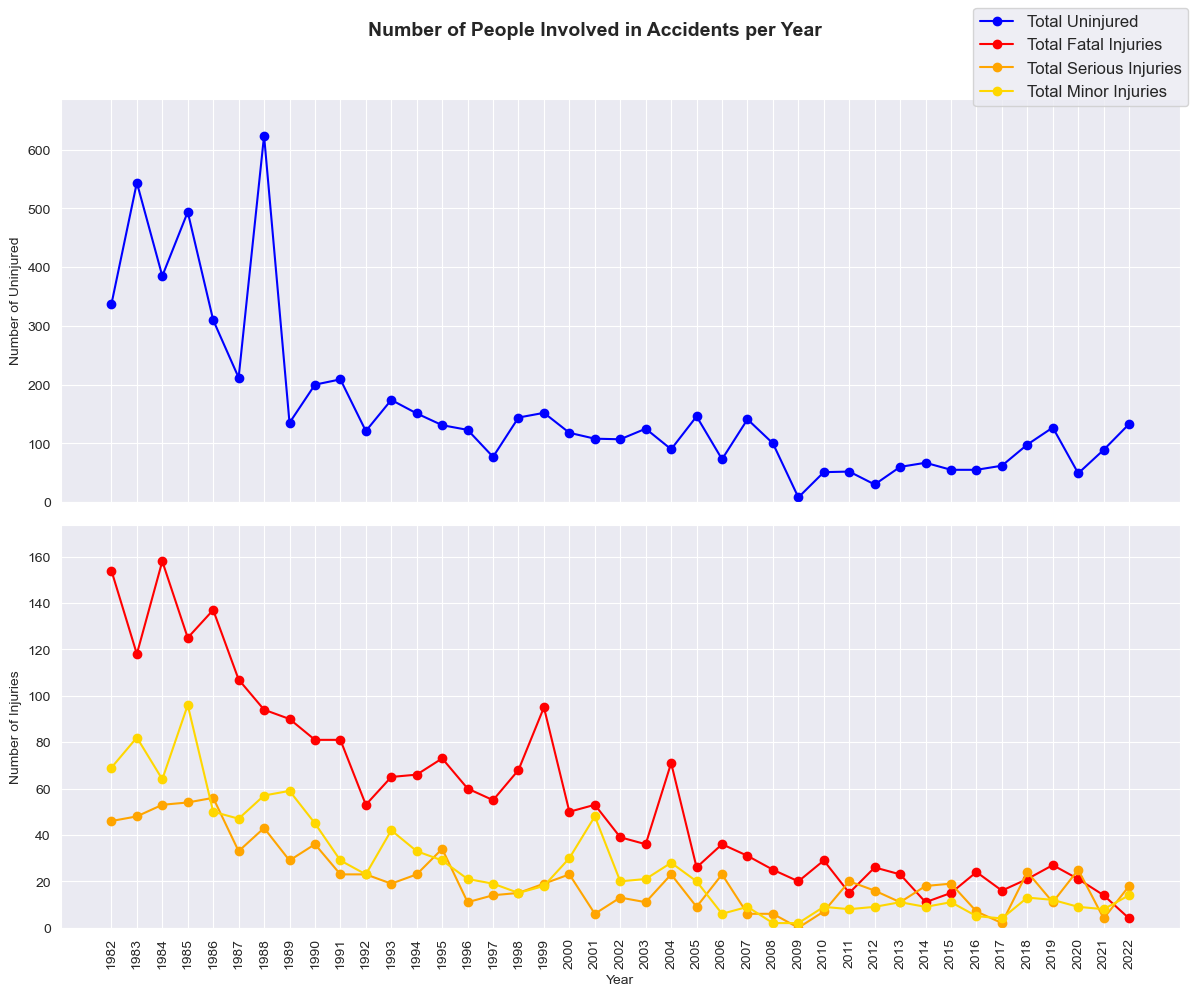

In [39]:
# Create the figure and subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Determine appropriate y-axis limits dynamically
uninjured_max = df_yearly["Total.Uninjured"].max()
injuries_max = max(
    df_yearly["Total.Fatal.Injuries"].max(), 
    df_yearly["Total.Serious.Injuries"].max(), 
    df_yearly["Total.Minor.Injuries"].max()
)

# Plot Total Uninjured
ax[0].plot(
    df_yearly["Event.Year"], df_yearly["Total.Uninjured"], 
    marker="o", linestyle="-", color="blue", label="Total Uninjured"
)
ax[0].set_ylabel("Number of Uninjured")
ax[0].set_ylim(0, uninjured_max * 1.1)  # Dynamic scaling
ax[0].grid(True)

# Plot Fatal, Serious, and Minor Injuries
ax[1].plot(
    df_yearly["Event.Year"], df_yearly["Total.Fatal.Injuries"], 
    marker="o", linestyle="-", color="red", label="Total Fatal Injuries"
)
ax[1].plot(
    df_yearly["Event.Year"], df_yearly["Total.Serious.Injuries"], 
    marker="o", linestyle="-", color="orange", label="Total Serious Injuries"
)
ax[1].plot(
    df_yearly["Event.Year"], df_yearly["Total.Minor.Injuries"], 
    marker="o", linestyle="-", color="gold", label="Total Minor Injuries"
)

ax[1].set_ylabel("Number of Injuries")
ax[1].set_ylim(0, injuries_max * 1.1)  # Dynamic scaling
ax[1].grid(True)

# Ensure both plots share the same x-axis scale
ax[0].set_xticks(df_yearly["Event.Year"])  
ax[1].set_xticks(df_yearly["Event.Year"])  
ax[1].set_xlabel("Year")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title
fig.suptitle(
    "Number of People Involved in Accidents per Year", 
    fontsize=14, fontweight="bold"
)

# Combine legends and position at the top-right
handles_0, labels_0 = ax[0].get_legend_handles_labels()
handles_1, labels_1 = ax[1].get_legend_handles_labels()
fig.legend(
    handles_0 + handles_1, labels_0 + labels_1, 
    loc="upper right", fontsize=12
)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


#### Insights from the Visualization

Although the dataset's documentation states that it covers airplane accidents from 1962 to 2023, after applying various filters and cleaning processes, this visualization explores trends from 1982 to 2022.  

Over time, both the number of uninjured individuals and the number of injuries have shown a general decline. This suggests that entering the airplane business has become considerably less risky than it once was, as aviation safety continues to improve. The overall decrease in accidents is likely driven by several factors:  

- Advancements in aviation technology, including more reliable aircraft, better maintenance procedures, and improved navigation systems, have contributed to a safer industry.  
- Stricter safety regulations and enhanced pilot training programs have led to fewer accidents.  
- Increased automation and improved air traffic management have minimized human errors, which were historically a leading cause of aviation incidents.  

While occasional spikes in injuries or fatalities occur in certain years, these are likely tied to specific high-casualty events rather than an overall reversal of the downward trend. Additionally, despite the inherent risks of aviation, it is encouraging that in most accidents, more individuals survive—whether uninjured or with minor injuries—compared to those who suffer fatalities. This highlights the industry's progress in improving aircraft designs, emergency response protocols, and overall survivability.  

Ultimately, this visualization reinforces the long-term success of aviation safety advancements, reducing both accident frequency and fatality rates, making air travel and aircraft operation safer than ever before.  


## 【4】 *Business Recommendation*

Based on our analysis of the NTSB aviation accident database, we have identified key insights that provide valuable information for decision-making regarding airplane selection and safety considerations.

1. *Airplane Make-Model Insights*  
Analysis of the dataset identifies the **Piper PA-42-720, Piper PA-44-180, and Cessna 421** as the top aircraft models with the highest number of uninjured individuals in recorded incidents. This suggests that these aircrafts have demonstrated a strong record of survivability in past accidents. Factors such as build quality, operational use, and maintenance history could contribute to this outcome. While this data supports their selection, further examination of maintenance trends and operational environments is recommended to reinforce safety standards.  

2. *Phase of Flight Insights*  
The phase of flight plays a crucial role in accident occurrences, with takeoff, landing, and cruise identified as the most critical phases requiring heightened safety measures. Takeoff and landing present the highest risk due to factors such as mechanical failures, human error, and adverse weather conditions, while cruise-phase incidents, though less frequent, often result in severe consequences. Notably, the overall frequency of aviation accidents has significantly declined over time. However, despite this positive trend, the identified phases remain key areas of concern where strict safety protocols, real-time monitoring systems, and continuous crew preparedness are essential to maintaining operational security.  

3. *Injury Severity Insights*  
There has been a gradual decline in the number of injured and uninjured individuals as accident frequency decreased over time. This reduction in accidents could be attributed to several factors, including advancements in aircraft technology, stricter regulatory oversight, improved pilot training, and enhanced maintenance protocols. As safety measures and operational procedures have evolved, accident rates have followed a downward trend, reinforcing the importance of continuous improvement in aviation safety. The business should prioritize comprehensive pilot training programs, stringent maintenance schedules, and investment in modern safety enhancements. Ensuring that flight crews are well-trained to handle emergency scenarios and incorporating the latest safety technologies can further mitigate operational risk.  

Based on the analysis, the **Piper PA-42-720, Piper PA-44-180, and Cessna 421** emerge as strong airplane choices due to their history of higher survivability in recorded incidents. However, ensuring safe operations extends beyond airplane selection. The phase of flight analysis highlights critical risk areas during takeoff, landing, and cruise, emphasizing the need for targeted safety measures such as pilot training, advanced avionics, and proactive maintenance. Additionally, injury severity trends indicate that accidents have become less frequent over time, driven by technological advancements, regulatory improvements, and enhanced operational protocols. This decline underscores the fact that breaking into the aviation industry today carries significantly lower risk than in the past. By integrating these insights into operational planning, businesses can not only mitigate risks but also establish a strong foundation for safe and efficient aircraft operations, ensuring long-term success in the industry.  


## 📌 **Limitations of my Analysis** 
While the risk analysis provides valuable insights for aircraft selection and operational safety, there are key limitations that must be acknowledged:  

- **Potential Data Inaccuracies** – Human error was observed in accident reports, raising the possibility that figures related to injuries and uninjured passengers may not be entirely reliable. Without access to full accident reports for verification, it is difficult to determine whether all data entries were recorded accurately.  

- **Lack of Accident Severity Consideration** – All incidents have been treated equally, despite some being minor while others resulted in total aircraft loss. A more refined analysis that categorizes accidents by severity would provide deeper insight into how well specific aircraft models perform under different levels of impact.  

- **Absence of Pilot Skill Assessment** – Pilot experience plays a critical role in aviation safety, yet the dataset does not account for this factor. An aircraft may appear riskier simply because it is commonly flown by less experienced pilots, rather than due to any flaw in its design or performance.  

- **Potential Influence of Favorable Accident Conditions** – Certain aircraft may have survived accidents due to external factors such as terrain, weather, or emergency response efficiency rather than their own structural integrity. This could skew the data in ways that make some models appear safer than they actually are.  

- **Lack of Long-Term Performance Data** – The analysis focuses solely on accident data rather than historical aircraft performance. A more comprehensive study should assess which aircraft models have consistently demonstrated safety and reliability over time, rather than basing recommendations on survivability in isolated incidents.  

- **Absence of Cost-Benefit Considerations** – While the analysis emphasizes risk assessment, financial viability is equally important. Selecting an aircraft should balance safety with factors such as purchase price, maintenance costs, operational efficiency, and return on investment to ensure long-term profitability for the business.  

